In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [16]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # 禁用換行

inbody_df = pd.read_csv('inbody.csv')
train_df = pd.read_csv('Train.csv')

In [17]:
#檢查離奇數值
col_filter = 'Muscle_Mass'
std_range = 3
std_value = inbody_df[col_filter].std()
mean_value = inbody_df[col_filter].mean()
errorData = inbody_df[abs(inbody_df[col_filter] - mean_value) > std_range * std_value]
print(errorData)

inbody_df.loc[errorData.index,col_filter] = None
errorData = inbody_df[abs(inbody_df[col_filter] - mean_value) > std_range * std_value]
print(errorData)


      Date  Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage   BMI  Visceral_Fat
187  11/12    62.5         17.4      13.6                 21.7  23.5           5.0
Empty DataFrame
Columns: [Date, Weight, Muscle_Mass, Body_Fat, Body_Fat_Percentage, BMI, Visceral_Fat]
Index: []


In [18]:


inbody_df2 = inbody_df.interpolate(method='linear', axis=0)#內插資訊
inbody_df = inbody_df2
print(inbody_df.head(30))

#轉化為每周
print(train_df.head(10))

     Date     Weight  Muscle_Mass   Body_Fat  Body_Fat_Percentage        BMI  Visceral_Fat
0   05/09  67.200000        28.50  16.100000               23.900  25.300000      6.000000
1   05/10  66.900000        28.30  16.400000               24.500  25.200000      6.000000
2   05/11  66.700000        27.90  16.900000               25.400  25.100000      6.000000
3   05/12  66.700000        28.70  15.600000               23.400  25.100000      6.000000
4   05/13  67.250000        28.40  16.700000               24.800  25.300000      6.500000
5   05/14  67.800000        28.10  17.800000               26.200  25.500000      7.000000
6   05/15  67.300000        28.90  15.800000               23.500  25.300000      6.000000
7   05/16  67.000000        28.35  16.450000               24.600  25.200000      6.500000
8   05/17  66.700000        27.80  17.100000               25.700  25.100000      7.000000
9   05/18  67.300000        29.20  15.400000               22.900  25.300000      6.000000

C:\Users\Tim\AppData\Local\Temp\ipykernel_19104\1014012310.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  inbody_df2 = inbody_df.interpolate(method='linear', axis=0)#內插資訊


In [63]:
#正規化
def normalize_dataframe(df, col):
    to_normalize = scaler.fit_transform(df[[col]]) 
    df[col] = to_normalize

scaler = MinMaxScaler()
print(inbody_df.keys)

normalize = inbody_df
normalize_dataframe(normalize,'Weight')
normalize_dataframe(normalize,'Muscle_Mass')
normalize_dataframe(normalize,'Body_Fat')
normalize_dataframe(normalize,'Body_Fat_Percentage')
normalize_dataframe(normalize,'BMI')
normalize_dataframe(normalize,'Visceral_Fat')
print(normalize)


<bound method NDFrame.keys of           Date    Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage       BMI  Visceral_Fat
0   2023-05-09  0.900000     0.758621  0.689189             0.636364  0.983193      0.666667
1   2023-05-10  0.850000     0.689655  0.729730             0.696970  0.974790      0.666667
2   2023-05-11  0.816667     0.551724  0.797297             0.787879  0.966387      0.666667
3   2023-05-12  0.816667     0.827586  0.621622             0.585859  0.966387      0.666667
4   2023-05-13  0.908333     0.724138  0.770270             0.727273  0.983193      0.833333
..         ...       ...          ...       ...                  ...       ...           ...
216 2023-12-11  0.116667     0.482759  0.270270             0.323232  0.831933      0.333333
217 2023-12-12  0.116667     0.482759  0.270270             0.323232  0.831933      0.333333
218 2023-12-13  0.116667     0.482759  0.270270             0.323232  0.831933      0.333333
219 2023-12-14  0.116667     0.482759  0

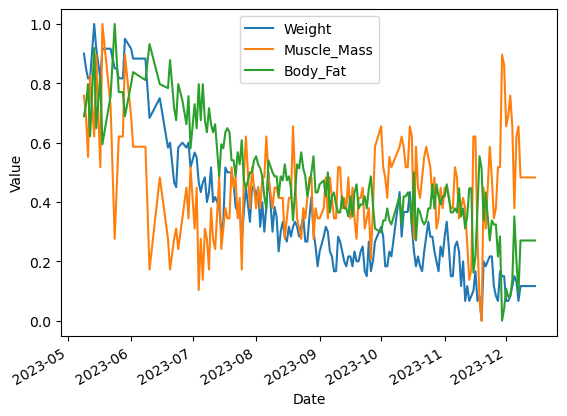

In [69]:
fig, ax = plt.subplots()
inbody_df['Date'] = pd.to_datetime(inbody_df['Date'])
inbody_df['Date'] = inbody_df['Date'].apply(lambda x: x.replace(year=2023))
x = inbody_df["Date"]

def plot_by_label(col):
    ax.plot(x,normalize[col],label=col)

plot_by_label('Weight')
plot_by_label('Muscle_Mass')
plot_by_label('Body_Fat')
#plot_by_label('Body_Fat_Percentage')
#plot_by_label('BMI')
#plot_by_label('Visceral_Fat')

# 添加图例
ax.legend()

# 添加 x 轴和 y 轴标签
plt.xlabel("Date")
plt.ylabel("Value")

# 自动调整日期标签以防止重叠
fig.autofmt_xdate()

# 显示图形
plt.show()